# Advanced image processes Ⅲ

&copy; 李浩东 3190104890@zju.edu.cn
&copy; 孙正男 3190104890@zju.edu.cn

- Contour finding
- Contour approximation


# 1 Contour extraction

![000](./images/contour_extraction.png)


- The method of ***hollowing out*** the interior points can be used to extract the contour of the binary image. The principle is as follows
     - Assuming that the background color is ***black*** and the target color is ***white***, if there is a pixel in the ***original*** image that is white, and its $8$ ***adjacent points*** are all ***white***, it can be determined that the point is an ***internal*** point, then delete the point, also it's just hollowing out the interior.

- In the binary image, it is assumed that the gray value of the background pixel is $0$, the gray value of the scene pixel is $1$, and the extraction rule of the boundary contour is
     - If the center pixel value is $0$ , regardless of the value of the remaining $8$ adjacent pixels, the center pixel value $0$ will be retained
     - If the center pixel value is $1$ , and the remaining $8$ adjacent pixel values are all $1$ , then change the center pixel value to $0$
     - All except the above, change the center pixel value to $1$

## 1.1 contour extraction in opencv
* `contours, hierarchy = cv2.findContours(img，mode, method)`：找出图中的轮廓值，得到的轮廓值都是嵌套格式的
    * contours：list，list中每个元素都是图像中的一个轮廓，用numpy.ndarray表示
    * hierarchy：ndarray，元素个数和轮廓个数相同。每个轮廓contours[i]对应4个hierarchy元素hierarchy[i][0:4]，分别表示后一个轮廓、前一个轮廓、父轮廓、内嵌轮廓的索引编号。如果没有对应项，该值为负数
    * img: 输入的图片
    * mode: 轮廓检索模式，通常都使用RETR_TREE找出所有的轮廓值
        * cv2.RETR_EXTERNAL：表示只检测外轮廓
        * cv2.RETR_LIST：检测的轮廓不建立等级关系
        * cv2.RETR_CCOMP：建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一个连通物体，这个物体的边界也在顶层
        * cv2.RETR_TREE：建立一个等级树结构的轮廓
    * method： 轮廓逼近方法，使用None表示所有轮廓都显示
        * cv2.CHAIN_APPROX_NONE：存储所有的轮廓点，相邻的两个点的像素位置差不超过1，即max（abs（x1-x2），abs（y2-y1））==1
        * cv2.CHAIN_APPROX_SIMPLE：压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，例如一个矩形轮廓只需4个点来保存轮廓信息
        * cv2.CHAIN_APPROX_TC89_L1，CV_CHAIN_APPROX_TC89_KCOS：使用teh-Chinl chain 近似算法
* `cv2.drawContours(img, contours, contourIdx, color, thickness)`： 画出图片中的轮廓值，也可以用来画轮廓的近似值
    * img：输入的需要画的图片
    * contours：轮廓，在Python中是一个list
    * contourIdx：表示轮廓的索引
    * color：绘制颜色，比如(0, 0, 255)
    * thickness：表示轮廓线宽度，如果是-1(cv2.FILLED)则为填充模式

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'binary')

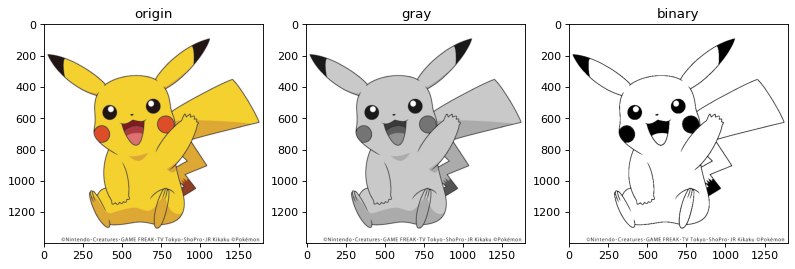

In [2]:
# Imread
img_pk = cv2.imread("./images/advanced/pikaqiu.jpg",cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img_pk, cv2.COLOR_BGR2GRAY)
ret, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# plt
plt.figure(figsize=(12,4), dpi=80)
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img_pk, cv2.COLOR_BGR2RGB))
plt.title("origin")
plt.subplot(1,3,2)
plt.imshow(img_gray, "gray")
plt.title("gray")
plt.subplot(1,3,3)
plt.imshow(img_bin, "gray")
plt.title("binary")

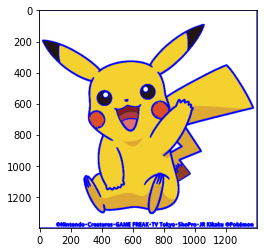

In [3]:
# contour extraction
contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# draw contour
draw_img = img_pk.copy()
ret = cv2.drawContours(draw_img, contours, -1, (255,0,0), 5)

#plt 
plt.imshow(cv2.cvtColor(ret, cv2.COLOR_BGR2RGB))

# 2 Polygon approximation of contour

![polygon_approximation_of_contour](./images/polygon_approximation_of_contour.png)


(413, 660, 3)


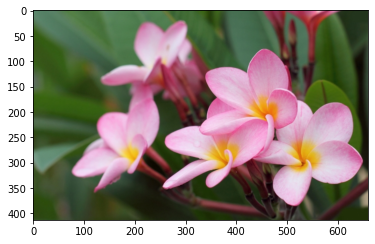

In [1]:
# Imread
import cv2
from matplotlib import pyplot as plt
import numpy as np

img_bgr = cv2.imread("./images/beautiful_flower.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)
plt.imshow(img_rgb)
img_gray = cv2.imread("./images/beautiful_flower.jpg", flags=0)

(413, 660)


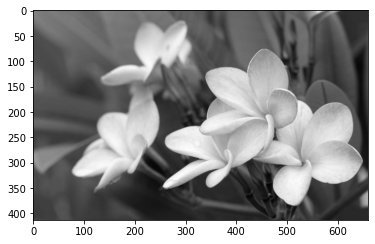

In [2]:
# GrayScale
print(img_gray.shape)
plt.imshow(img_gray, "gray")

(413, 660)


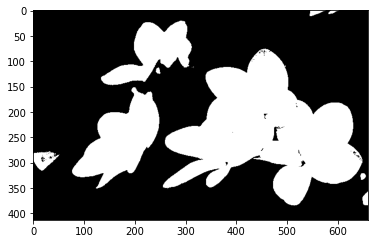

In [3]:
# Binary
ret, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
print(img_bin.shape)
plt.imshow(img_bin, "gray")

number of contours: 67


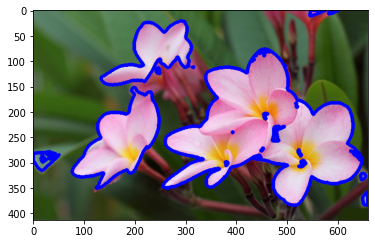

In [4]:
contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
print("number of contours: " + str(len(contours)))
img_rgb_copy = np.copy(img_rgb)
img_con = cv2.drawContours(img_rgb_copy, contours, -1, (0,0,255), 5)
plt.imshow(img_con)

In [5]:
# 筛选主要边界
contours = sorted(contours, key=lambda x: len(x))
print("contours length ->", [len(contours[i]) for i in range(len(contours))])
start_index = 0
for index, single_contour in enumerate(contours):
    if len(single_contour) >= 250:
        print("update start_index")
        start_index = index
        break
print("start index ->", start_index)
print("number of contours: " + str(len(contours) - start_index))

contours length -> [1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 8, 8, 9, 10, 10, 10, 10, 11, 12, 12, 15, 16, 17, 19, 21, 25, 27, 42, 72, 293, 325, 787]
update start_index
start index -> 64
number of contours: 3


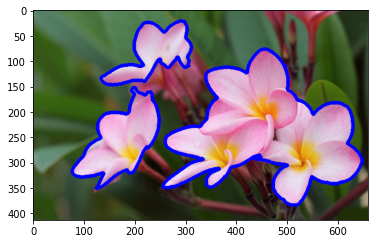

In [6]:
img_rgb_copy = np.copy(img_rgb)
img_con_new = cv2.drawContours(img_rgb_copy, contours[start_index:], -1, (0,0,255), 5)
plt.imshow(img_con_new)

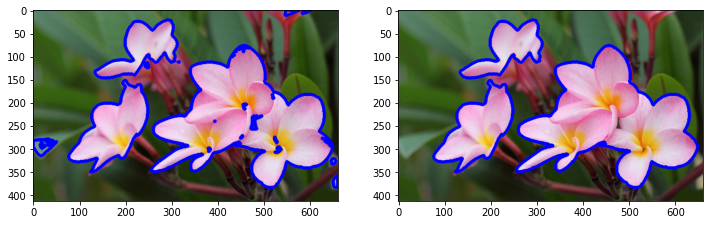

In [7]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_con)
plt.subplot(1, 2, 2)
plt.imshow(img_con_new)

## 1.1 Contour approximation

![bounding](./images/bounding.png)


* `cv2.contourArea(cnt， True)` # 计算轮廓面积
    * cnt：输入的单个轮廓值
* `cv2.arcLength(cnt， True)` # 计算轮廓周长
    * cnt：输入的单个轮廓值
* `x, y, w, h = cv2.boudingrect(cnt)` # 获得外接矩形
    * x，y, w, h 分别表示外接矩形的x轴和y轴的坐标，以及矩形的宽和高
    * cnt表示输入的轮廓值
* `(x, y), radius = cv2.minEnclosingCircle(cnt)` # 获得外接圆
    * (x, y)：外接圆的圆心
    * radius：外接圆的半径
    * cnt：输入的轮廓
* 最小外接矩形：
    * `rotatedRect = cv2.minAreaRect(cnt)`  # 计算单条轮廓cnt的最小外接矩形
    * `box = cv2.boxPoints(rotatedRect)`  # 生成外接矩形轮廓
* `ellipse = cv2.fitEllipse(cnt)` # 椭圆
    * ellipse：[ (x, y) , (a, b), angle ]
        * （x, y）代表椭圆中心点的位置
        * （a, b）代表长短轴长度，应注意a、b为长短轴的直径，而非半径
        *  angle 代表了中心旋转的角度

length -> 648.5828212499619
length -> 695.452879190445
length -> 1702.9545282125473


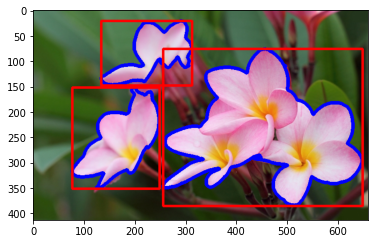

In [8]:
# 矩形框
img_rgb_rect = np.copy(img_con_new)
for i in range(len(contours) - start_index):
    x, y, w, h = cv2.boundingRect(contours[i + start_index])
    print("length ->",  cv2.arcLength(contours[i + start_index], True))
    cv2.rectangle(img_rgb_rect, (x, y), (x + w, y + h), (255, 0, 0), 3)
plt.imshow(img_rgb_rect)

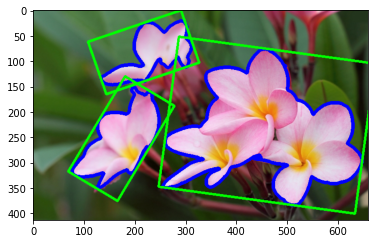

In [9]:
# 最小矩形框
img_rgb_minrect = np.copy(img_con_new)
for i in range(len(contours) - start_index):
    rect = cv2.minAreaRect(contours[i + start_index])
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img_rgb_minrect, [box], 0, (0, 255, 0), 3)
plt.imshow(img_rgb_minrect)

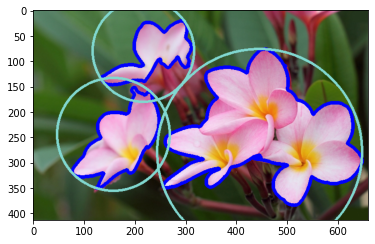

In [10]:
# 圆形框
img_rgb_cir = np.copy(img_con_new)
for i in range(len(contours) - start_index):
    (x, y), radius = cv2.minEnclosingCircle(contours[i + start_index])
    center, radius = (int(x), int(y)), int(radius)
    cv2.circle(img_rgb_cir, center, radius, (129, 216, 208), 3)
plt.imshow(img_rgb_cir)

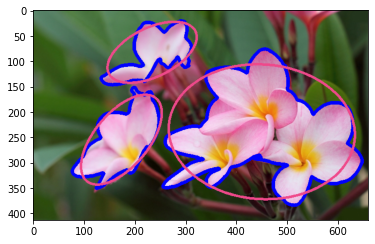

In [11]:
# 椭圆框
img_rgb_ell = np.copy(img_con_new)
for i in range(len(contours) - start_index):
    ellipse = cv2.fitEllipse(contours[i + start_index])
    cv2.ellipse(img_rgb_ell, ellipse, (239, 73, 139), 3)
plt.imshow(img_rgb_ell)

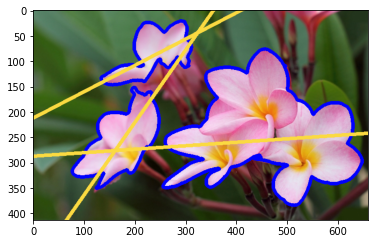

In [12]:
# fitline 直线拟合
img_rgb_fitline = np.copy(img_con_new)
rows, cols = img_rgb_fitline.shape[:2]
for i in range(len(contours) - start_index):
    [vx, vy, x, y] = cv2.fitLine(contours[i + start_index], 
                                 cv2.DIST_L2, 0, 0.01, 0.01)
    lefty = int((-x * vy / vx) + y)
    righty = int(((cols - x) * vy / vx) + y)
    cv2.line(img_rgb_fitline, (cols - 1, righty), (0, lefty), (251, 218, 65), 5)
plt.imshow(img_rgb_fitline)

## 1.2 Polygon & Convex Hull contour approximation 

- Below, in second image, green line shows the approximated curve for epsilon = 10% of arc length. Third image shows the same for epsilon = 1% of the arc length. Third argument specifies whether curve is closed or not
- ***Original***, ***epsilon = 10%***, ***epsilon = 1%***

![approx_1](./images/approx_1.jpg)


- 当我们找到一个轮廓进行形状分析时，我们通常需要使用多边形来近似轮廓，这样顶点的数量就会减少
- The `approxPolyDP` function of `OpenCV` can achieve this function
- The `approxPolyDP` function uses the `Douglas-Peucker` algorithm
     * 在曲线首尾两点A，B之间连接一条直线AB，该直线为曲线的弦
     * 得到曲线上离该直线段距离最大的点C，计算其与AB的距离d
     * 比较该距离与预先给定的阈值threshold的大小，如果小于threshold，则该直线段作为曲线的近似，该段曲线处理完毕
     * 如果距离大于阈值，则用C将曲线分为两段AC和BC，并分别对两段取信进行1~3的处理
     * 当所有曲线都处理完毕时，依次连接各个分割点形成的折线，即可以作为曲线的近似
     <img src="./images/advanced/Douglas_Peucker.jpg" style="zoom:80%;">

* `approx = cv2.approxPolyDP(cnt, epsilon,True)`   # 多边形拟合轮廓
    * approx：list，列表中每个元素代表一个边沿信息。每个元素是(x,1,2)的三维向量，x表示该条边沿里共有多少个像素点，第三维表示每个点的横、纵坐标
    * cnt: list列表
    * epsilon： Douglas-Peucker算法参数
    * True 参数3表示是否闭合

Text(0.5, 1.0, 'approx polygon')

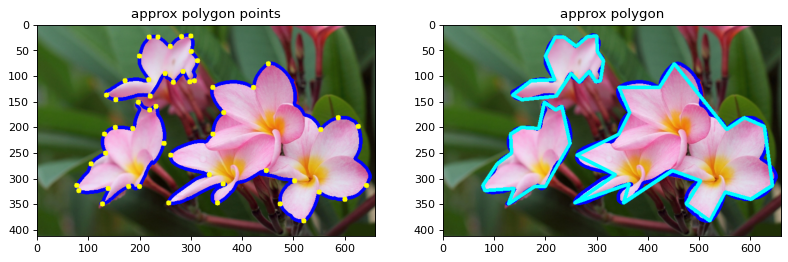

In [13]:
# approx polygon
img_rgb_PolyPoints = np.copy(img_con_new)
img_rgb_Poly = np.copy(img_con_new)
for i in range(len(contours) - start_index):
    perimeter = cv2.arcLength(contours[i + start_index],True)
    epsilon = 0.01 * perimeter
    approx = cv2.approxPolyDP(contours[i + start_index], epsilon, True)
    cv2.drawContours(img_rgb_PolyPoints, approx, -1, (255,255,0), 10)
    cv2.drawContours(img_rgb_Poly, [approx], -1, (0,255,255), 5)

# plt
plt.figure(figsize=(12, 8), dpi=80)
plt.subplot(1,2,1)
plt.imshow(img_rgb_PolyPoints)
plt.title("approx polygon points")
plt.subplot(1,2,2)
plt.imshow(img_rgb_Poly)
plt.title("approx polygon")

### Convex Hull 凸包
- 数学定义：在一个向量空间中，对于给定几何X， 所有包含X的凸集的交集S被称为X的凸包
- 场景：图像处理过程中，常常需要寻找图像中，包围某个物体的凸包。凸包跟多边形逼近很像，只不过它是包围物体外层的一个凸集，这个凸集是所有能包围这个物体的凸集的交集。
- 例如，检查下面的手的图像。红线表示手的凸包。双向箭头标记显示了凸面缺陷，这是凸包与轮廓的局部最大偏差。

![convex_hand](./images/convex_hand.jpg)


Text(0.5, 1.0, 'approx convexHull')

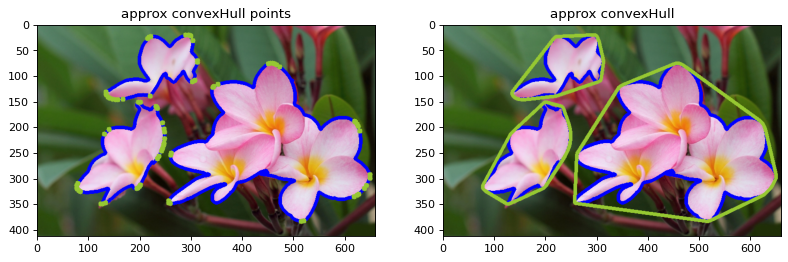

In [15]:
# convexHull
img_rgb_convexHullPoints = np.copy(img_con_new)
img_rgb_convexHull = np.copy(img_con_new)
for i in range(len(contours) - start_index):
    hull = cv2.convexHull(contours[i + start_index])
    cv2.drawContours(img_rgb_convexHullPoints, hull, -1, (150,200,50), 10)
    cv2.drawContours(img_rgb_convexHull, [hull], -1, (150,200,50), 5)
    
# plt
plt.figure(figsize=(12, 8), dpi=80)
plt.subplot(1,2,1)
plt.imshow(img_rgb_convexHullPoints)
plt.title("approx convexHull points")
plt.subplot(1,2,2)
plt.imshow(img_rgb_convexHull)
plt.title("approx convexHull")

# The End

2023.4